<a href="https://colab.research.google.com/github/TosinGeorge/Data-Science-Projects/blob/main/Financial_Inclusion_Challenge_Zindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Financial Inclusion Prediction**

The aim of this project is to predict whether a person will have a bank account or not based on the following features below:
* country                 
* year                   
* uniqueid                
* location_type           
* cellphone_access        
* household_size          
* age_of_respondent      
* gender_of_respondent   
* relationship_with_head 
* marital_status         
* education_level        
* job_type         

* Import the necessary libraries



In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

* Import the test and train datasets







In [2]:
#importing the dataset
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

* Determining the shapes of our datasets


In [3]:
#shape of datasets
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [4]:
#exploring samples of the dataset
train.sample(4)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
3148,Kenya,2018,uniqueid_3149,No,Urban,Yes,2,38,Female,Other non-relatives,Divorced/Seperated,Primary education,Formally employed Private
2988,Kenya,2018,uniqueid_2989,No,Rural,Yes,12,19,Male,Child,Single/Never Married,Secondary education,Farming and Fishing
17508,Tanzania,2017,uniqueid_2706,No,Urban,Yes,3,17,Male,Parent,Divorced/Seperated,Primary education,Self employed
8432,Rwanda,2016,uniqueid_2365,No,Rural,Yes,5,69,Female,Head of Household,Widowed,Primary education,Informally employed


In [5]:
#exploring the columns names,datatypes and values counts
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [6]:
#checking for null values
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

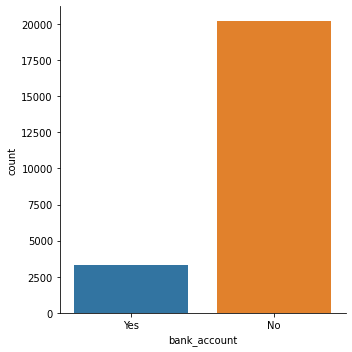

In [7]:
# Explore the target column 
sns.catplot(x="bank_account", kind="count", data=train);

### Data Preprocessing

In [8]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Label encode the target column
train['bank_account'] = LabelEncoder().fit_transform(train['bank_account'])

#Separate training features and target feature
x_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

In [9]:
x_train.sample(3)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
8401,Rwanda,2016,uniqueid_2334,Urban,Yes,5,25,Female,Parent,Single/Never Married,Primary education,Informally employed
450,Kenya,2018,uniqueid_451,Urban,Yes,4,70,Male,Head of Household,Married/Living together,Vocational/Specialised training,Remittance Dependent
4819,Kenya,2018,uniqueid_4820,Urban,Yes,1,43,Male,Head of Household,Married/Living together,Secondary education,Formally employed Private


In [10]:
#preprocessing data
#create function to convert integer columns to floats,label encode categorical columns, drop our unique_id column and scale the dataset. 
def processor(data):
  #convert integer columns to float to improve precision
  data['year'] = data['year'].astype(float)
  data['household_size'] = data['household_size'].astype(float)
  data['age_of_respondent'] = data['age_of_respondent'].astype(float)


  #Label Encoding
  data['country'] = LabelEncoder().fit_transform(data['country'])
  data['location_type'] = LabelEncoder().fit_transform(data['location_type'])
  data['cellphone_access'] = LabelEncoder().fit_transform(data['cellphone_access'])
  data['gender_of_respondent'] = LabelEncoder().fit_transform(data['gender_of_respondent'])
  data['relationship_with_head'] = LabelEncoder().fit_transform(data['relationship_with_head'])
  data['marital_status'] = LabelEncoder().fit_transform(data['marital_status'])
  data['education_level'] = LabelEncoder().fit_transform(data['education_level'])
  data['job_type'] = LabelEncoder().fit_transform(data['job_type'])

  #Drop unique_id column
  data = data.drop(['uniqueid'], axis=1)

  # scale our data into range of 0 and 1
  scaler = MinMaxScaler(feature_range=(0, 1))
  data = scaler.fit_transform(data)
 
  return data

In [11]:
# preprocess the train and test data 
p_train = processor(x_train)
p_test = processor(test)

In [12]:
#split the train dataset and import GridSearchCV for identify the best performing model 
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

In [13]:
#split train data
x_train, x_val, y_train, y_val = train_test_split(p_train, y_train,test_size = 0.1, random_state = 42)

In [14]:
#importing the necessary libraries

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [15]:
#specifing the parameters for each model

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [0.1,1, 10, 100], 
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']
            } 
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,50,100,200,500]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'max_iter': [20, 50, 100, 200, 500, 1000],                      
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
            'class_weight': ['balanced']  
        }
    },
    'xgbclassifier':{
        'model': XGBClassifier(),
        'params': {'min_child_weighth': [1, 5, 10,15,20],
            'gamma': [0.5, 1,1.5,2,5,10],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 5,10,13],
            'scale_pos_weight': [1,5,10,15,20],
            'objective':['binary:logistic']}
    },
    'lgbmclassifier' : {
        'model': LGBMClassifier(),
        'params': {'bagging_fraction': [0.5, 0.8],
        'n_estimator':[100, 200,300,400,500],
        'min_child_weight': [1, 5, 10,15,20],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [10, 13],
        'min_data_in_leaf': [90, 120],
        'num_leaves': [1200, 1550]}
    }
}

In [16]:
#identifying the model with the best score and parameter

scores = []

for model_name, mp in model_params.items():
    clf =  HalvingGridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
pd.set_option('display.max_colwidth', None)

df

,model,best_score,best_params
0,svm,0.876453,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
1,random_forest,0.867508,{'n_estimators': 500}
2,logistic_regression,0.737086,"{'C': 10, 'class_weight': 'balanced', 'max_iter': 200, 'solver': 'newton-cg'}"
3,xgbclassifier,0.886800,"{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 10, 'min_child_weighth': 1, 'objective': 'binary:logistic', 'scale_pos_weight': 1, 'subsample': 0.8}"
4,lgbmclassifier,0.884399,"{'bagging_fraction': 0.5, 'colsample_bytree': 0.6, 'max_depth': 10, 'min_child_weight': 1, 'min_data_in_leaf': 90, 'n_estimator': 500, 'num_leaves': 1200, 'subsample': 1.0}"


The most accurate model is the XGB Model with an accuracy score of 88.68%

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters for the XGB model
xgb_model = XGBClassifier(colsample_bytree= 0.6, gamma=5, max_depth= 10, min_child_weighth=1, objective='binary:logistic', scale_pos_weight=1, subsample=0.8)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.1079473013174671


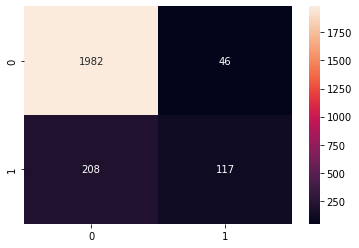

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt= '.0f');
